In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dracula')
from random import random 

# Monte Carlo integration

Rutherford scattering: In fact we could have done the calculation for the $ \alpha $ particles analytically. For a particle to be scattered through more than $ 90^° $ the impact parameter must, as we said, be less than $ b = Z e^2 / 2 \pi \epsilon_0 E $, but the 
impact parameter is distributed according to the radial distribution function

$$ p(r) = \frac{r}{\sigma^2} \exp \left\{ -\frac{r^2}{2\sigma^2} \right\} $$

Thus the probability of scattering is

$$ \frac{1}{\sigma^2} \int_0^b \mathrm{d}r \exp \left\{ -\frac{r^2}{2\sigma^2} \right\} r = 1 - \exp \left\{ -\frac{Z^2 e^4}{8 \pi^2 \epsilon^2_0 \sigma^2 E^2} \right\} \label{10.21}\tag{10.21}$$

If we take the values of the parameters we get a fraction of reflected particles equal to $ 0.156\% $, in good agreement with the numerical result.

Look at this way: if $ \eqref{10.21} $ and the computer program both calculate the same thing, it implies that we can calculate the value of the integral, an integral that has a known exact value, approximately by simulating a random process using random numbers. Deep result: **we can calculate the answers to exact calculations by doing random calculations**.

- Normally, we are interested in some physical process that has a random element, but instead we write down an exact, non-random calculation that gives an answer for its average behavior. 
- There's no reason why we cannot make the argument in reverse: start with an exact problem, such as the calculation of an integral, and find an approximate solution to it by running a suitable random process on the computer.

### The "hit-or-miss" method

Suppose we want to evaluate

$$ I = \int_0^2 \mathrm{d}x \sin^2 \left[ \frac{1}{x(2 - x)} \right] $$

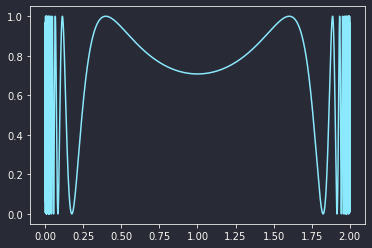

In [3]:
h = 0.0001
x = np.arange(0 + h, 2, h)
y = np.sin(1/(x*(2 - x)))**2
plt.plot(x, y)
plt.show()

This integrand is perfectly well behaved in the middle of its range, but it varies infinitely fast at the edges, which makes the integral challenging. On the other hand, the value of the integral is finite and must be less than $ 2 $. How can we find what it is?

If the area under the curve is $ I $ and given that the area of the bounding rectangle is $ A = 2 $, if we choose a point uniformly at random in the rectangle, the probability that the point falls in the shaded region is $ p = I/A $.

- Scheme: we generate a large number $ N $ of random points in the bounding rectangle, check each one to see if it's below the curve and keep a count of the number that are. Let's call this number $ k $. Then the fraction of points below the curve, which is $ k/N $, should be approximately equal to the probability $ p $. That is,

$$ p \approx \frac{k}{N} \qquad \Rightarrow \qquad I \approx \frac{Ak}{N} $$

- Since we've measured $ k $ and we know $ A $ and $ N $, we can evaluate this expression and hence get an approximate result for the value $ I $ of the integral: *Monte Carlo integration* (famous casino town in Monaco). 

In [4]:
def f(x):
    return (np.sin(1/(x*(2 - x))))**2 

N, k = 1000000, 0
for _ in range(N):
    x, y = 2*random(), random()
    if y < f(x): k += 1

I = (2/N)*k
print(I)

1.453778


The main disadvantage: it doesn't give very accurate answers. The probability that a single random point falls below the curve is, as we have said $ p = I/A $. The probability that a particular $ k $ of our points fall below and the remaining $ N - k $ fall above is thus $ p^k (l - p)^{N - k} $. But there are $ C^N_k $ ways to choose the $ k $ points out of $ N $ total, so the total probability $ P(k) $ that we get exactly $ k $ points below the curve is

$$ P(k) = C^N_k p^k (1 - p)^{N - k} $$

The variance of this distribution is

$$ \text{var } k = N p (1 - p) = N \frac{I}{A} \left( 1 - \frac{I}{A} \right) $$

and the expected error on the integral $ I $ itself is

$$ \sigma = \sqrt{\text{var } k} \frac{A}{N} = \sqrt{\frac{I(A - I)}{N}} $$

The error varies with $ N $ as $ 1/\sqrt{N} $.

- With hundred samples, Monte-Carlo accuracy: $ 10 \% $, trapezoidal rule: $ 0.01 \% $, and Simpson's rule: $ 0.000001 \% $.

If we can use regular (non-Monte-Carlo) integration methods, we should. Monte Carlo integration should be used only for cases where other methods break down, which typically means for pathological integrands such as the one in this example or, as we will see, for integrals in high dimensions.

## The mean value method

We want to evaluate the integral $ I = \int_a^b \mathrm{d}x f(x)$ and by definition

$$ \left< f \right> = \frac{1}{b - a} \int_a^b \mathrm{d}x f(x) \qquad \Rightarrow \qquad I = (b - a) \left< f \right> $$

If we can estimate $ \left< f \right> $ then we can estimate $ I $: measure $ f(x) $ at $ N $ points $ x_1 , \dots , x_N $ chosen uniformly at random between $ a $ and $ b $ and calculate 

$$ \left< f \right> \approx \frac{1}{N} \sum_{i=1}^N f(x_i) \qquad \Rightarrow \qquad I \approx \frac{b - a}{N} \sum_{i=1}^N f(x_i) $$

This is the fundamental formula for the mean value method. We can estimate the error:

$$ \sigma = (b - a) \sqrt{\frac{\text{var } f}{N}} = (b - a) \sqrt{\frac{\left< f^2 \right> - \left< f \right>^2 }{N}} $$

Thus, once again, the error goes as $1/\sqrt{N}$. However, the leading constant is smaller in this case, which means the mean value method is always more accurate than our previous method.

In [5]:
def f(x):
    return (np.sin(1/(x*(2 - x))))**2 

N, S = 1000000, 0
for _ in range(N):
    x = 2*random()
    S += f(x)

I = (2/N)*S
print("{0:.4f}".format(I))

1.4522


## Integral in many dimensions

- Performing an integral over two variables by standard methods such as the trapezoidal rule requires us to take samples on a 2D grid of points. 3D integrals require a 3D grid, and so forth.
- If we have an integral over four or more variables, then the number of points on the grid can become very large and the standard integration methods can be very slow.
- If we use $ 100 $ points along each axis, for example, we'd need $ 100^4 $ integration points to do a four-dimensional integral. This might just about be possible, though slow, but for more points or more than four dimensions things rapidly become impractical. 
- The mean value method generalizes straightforwardly. The integral of a function $ f(\mathbf{r}) $ over a volume $ V $ in a high-dimensional space is given by

$$ I \approx \frac{V}{N} \sum_{i=1}^N f (\mathbf{r}_i) $$

In [3]:
# Prob. 10.7: Volume of a hypersphere
def sphere(X):
    if (np.dot(np.transpose(X), X)) <= 1:
        return 1
    return 0

N, S = 1000000, 0
D = 10 # dimension
X = np.empty(D)

for _ in range(N):
    for i in range(D):
        X[i] = 2*random() - 1
    S += sphere(X)

I = ((2**D)/N)*S
print("{0:.4f}".format(I))

2.5324


## Importance sampling

Monte Carlo gives problems if the function to be integrated contains a divergence. Consider the integral

$$ I = \int_0 ^1 \mathrm{d}x \frac{x^{-1/2}}{e^x + 1} $$

which arises in the theory of Fermi gases. Even though the integrand diverges at $ x = 0 $, the integral is perfectly finite in value. If you try to do it using the mean value method you'll run into problems because the value of $ f(x_i) $ diverges when $ x_i \rightarrow 0 $, so occasionally you'll get a very large contribution to the sum. The estimated value of the 
integral can vary widely from one run of the algorithm to another. Another way to look at this is to say that the error Another way to look at this is to say that the error $ \sigma $ on the estimate of the integral becomes large in such cases, and indeed you can show that it can even be formally infinite in some calculations. We can get around these problems by drawing our points $ x_i $ non-uniformly from the integration interval: *importance sampling*. For any general function $ g(x) $, we can define a weighted average

$$ \left< g \right>_w = \frac{\int_a^b \mathrm{d}x w(x) g(x)}{\int_a^b \mathrm{d}x w(x)}$$

where $ w(x) $ is any function we choose.

Consider $ I = \int_a^b \mathrm{d}x f(x) $ and setting $ g(x) = f(x)/w(x) $

$$ I = \left< \frac{f(x)}{w(x)} \right>_w \int_a^b \mathrm{d}x w(x) $$

How do we calculate the weighted average? Let us define a probability density function 

$$ p(x) = \frac{w(x)}{\int_a^b \mathrm{d}x w(x)} \label{10.39}\tag{10.39}$$

which is like the weight function $ w(x) $, but normalized so that its integral is $ 1 $. Let us sample $ N $ random points $ x_i $ nonuniformly with this density. That is, the probability of generating a value in the interval between $ x $ and $ x + \mathrm{d}x $ will be $ p(x) \mathrm{d}x $. Then the average number of samples that fall in this interval is $ N p(x) \mathrm{d}x $, and so for any function $ g(x) $

$$ \sum_{i=1}^N g(x_i) \approx \int_a^b \mathrm{d}x N p(x) g(x) $$

with the approximation getting better as the number of samples becomes larger. Using this result, we can now write the general weighted average of the function $ g(x) $ as 

$$ \left< g \right>_w \approx \frac{1}{N} \sum_{i=1}^N g(x_i) $$

where the points $ x_i $ are chosen from the distribution $ \eqref{10.39} $. Putting this result together we get

$$ I \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b \mathrm{d}x w(x) \label{10.42}\tag{10.42} $$

It is a generalization of the mean value method. This is useful because it allows us to choose a $ w(x) $ that gets rid of pathologies in the integrand $ f(x) $. For instance, if $ f(x) $ has a divergence, we can factor that divergence out and hence get a sum that is well behaved. The price we pay for this flexibility is that we have to draw our samples $ x_i $ from a non-uniform distribution of random numbers instead of a uniform one. We can also calculate the error

$$ \sigma = \sqrt{\frac{\text{var}_w (f/w)}{N}} \int_a^b \mathrm{d}x w(x) $$

Returning to the previous example, if we choose $ w(x) = x^{-l/2} $ then $ f(x)/w(x) = (e^x+ 1)^{-1} $ in this case, which is finite and well-behaved over the domain of integration. Using the transformation method, we would write a program that draws random $ x $ values in the range from zero to one from the distribution

$$ p(x) = \frac{1}{2\sqrt{x}} \qquad , \qquad \int_0^1 \mathrm{d}x w(x) = 2 $$

Importance sampling can be used to evaluate integrals over infinite domains. An integral from $ 0 $ to $ \infty $ can't be done using the ordinary mean value method, because we would have to generate random points $x_i$ uniformly between $ 0 $ and $ \infty $, which is impossible because their distribution would not be integrable. But importance sampling allows us to generate points from some other, nonuniform distribution, one that extends out to infinity but is integrable, such as an exponential distribution. If we choose our weight function $ w(x) = e^{-x} $, then $ \eqref{10.42} $ becomes

$$ I \approx \frac{1}{N} \sum_{i=1}^N e^{x_i} f(x_i) \int_0^{\infty} \mathrm{d} x e^{-x} = \frac{1}{N} \sum_{i=1}^N e^{x_i} f(x_i) $$

This equation says that we can sample points nonuniformly provided we compensate by weighting more heavily those points that all in regions where there are fewer of them. If the integrand took a pathological form, or if the integral were in a high-dimensional space, then Monte Carlo integration might become an attractive method.

In [5]:
# Prob. 10.8
def f(x):
    return x**(-1/2)/(np.exp(x) + 1)
def w(x): # int w = 2
    return x**(-1/2)

N, S = 1000000, 0
# n = 10000
# h = 1/n
# X = np.arange(h, 1, h)
# P = w(X)/np.sum(w(X))
# T = np.random.choice(X, N, p=P)
# S = np.sum(f(T)/w(T))
for _ in range(N):
    x = (random())**2 # transformation function
    S += f(x)/w(x)

I = (1/N)*S*2
print("{0:.4f}".format(I))

0.8389
